In [33]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
%matplotlib inline

In [34]:
sns.set_style('darkgrid')
plt.style.use('ggplot')

In [35]:
ac_feat = pd.read_csv('acoustic_features.csv',delimiter = '	')

In [36]:
song_pop = pd.read_csv('song_pop.csv',delimiter = '	')

In [37]:
ac_feat.head()

,song_id,duration_ms,key,mode,time_signature,acousticness,danceability,energy,instrumentalness,liveness,loudness,speechiness,valence,tempo
0,3e9HZxeyfWwjeyPAMmWSSQ,207320,1,1,4,0.22900,0.717,0.653,0.000000,0.1010,-5.634,0.0658,0.412,106.966
1,5p7ujcrUXASCNwRaWNHR1C,201661,6,1,4,0.29700,0.752,0.488,0.000009,0.0936,-7.050,0.0705,0.533,136.041
2,2xLMifQCjDGFmkHkpNLD9h,312820,8,1,4,0.00513,0.834,0.730,0.000000,0.1240,-3.714,0.2220,0.446,155.008
3,3KkXRkHbMCARz0aVfEt68P,158040,2,1,4,0.55600,0.760,0.479,0.000000,0.0703,-5.574,0.0466,0.913,89.911
4,1rqqCSm0Qe4I9rUvWncaom,190947,5,1,4,0.19300,0.579,0.904,0.000000,0.0640,-2.729,0.0618,0.681,82.014


In [38]:
song_pop.head()

,song_id,year_end_score,is_pop,year
0,0tgVpDi06FyKpA1z0VMD4v,5617,True,2018
1,3lFf4DnT68QjQGB3iq1BJ9,5549,True,2018
2,09IStsImFySgyp0pIQdqAc,4590,True,2018
3,3ee8Jmje8o58CHK66QrVC2,4430,True,2018
4,0U2pP3HpalMInP1lOhECsw,4363,True,2018


In [39]:
ac_feat.columns

Index(['song_id', 'duration_ms', 'key', 'mode', 'time_signature',
       'acousticness', 'danceability', 'energy', 'instrumentalness',
       'liveness', 'loudness', 'speechiness', 'valence', 'tempo'],
      dtype='object')

In [40]:
final_data = pd.merge(ac_feat, song_pop, how = 'inner', on ='song_id')

In [41]:
final_data.head()

,song_id,duration_ms,key,mode,time_signature,acousticness,danceability,energy,instrumentalness,liveness,loudness,speechiness,valence,tempo,year_end_score,is_pop,year
0,3e9HZxeyfWwjeyPAMmWSSQ,207320,1,1,4,0.22900,0.717,0.653,0.000000,0.1010,-5.634,0.0658,0.412,106.966,728,True,2018
1,5p7ujcrUXASCNwRaWNHR1C,201661,6,1,4,0.29700,0.752,0.488,0.000009,0.0936,-7.050,0.0705,0.533,136.041,1094,True,2018
2,2xLMifQCjDGFmkHkpNLD9h,312820,8,1,4,0.00513,0.834,0.730,0.000000,0.1240,-3.714,0.2220,0.446,155.008,2171,True,2018
3,3KkXRkHbMCARz0aVfEt68P,158040,2,1,4,0.55600,0.760,0.479,0.000000,0.0703,-5.574,0.0466,0.913,89.911,879,True,2018
4,1rqqCSm0Qe4I9rUvWncaom,190947,5,1,4,0.19300,0.579,0.904,0.000000,0.0640,-2.729,0.0618,0.681,82.014,1464,True,2018


In [42]:
final_data.drop(['duration_ms', 'key','mode','year'], axis=1,inplace=True)

In [43]:
final_data = pd.get_dummies(final_data,columns=['is_pop'],drop_first=True)

In [44]:
final_data.head()

,song_id,time_signature,acousticness,danceability,energy,instrumentalness,liveness,loudness,speechiness,valence,tempo,year_end_score,is_pop_True
0,3e9HZxeyfWwjeyPAMmWSSQ,4,0.22900,0.717,0.653,0.000000,0.1010,-5.634,0.0658,0.412,106.966,728,1
1,5p7ujcrUXASCNwRaWNHR1C,4,0.29700,0.752,0.488,0.000009,0.0936,-7.050,0.0705,0.533,136.041,1094,1
2,2xLMifQCjDGFmkHkpNLD9h,4,0.00513,0.834,0.730,0.000000,0.1240,-3.714,0.2220,0.446,155.008,2171,1
3,3KkXRkHbMCARz0aVfEt68P,4,0.55600,0.760,0.479,0.000000,0.0703,-5.574,0.0466,0.913,89.911,879,1
4,1rqqCSm0Qe4I9rUvWncaom,4,0.19300,0.579,0.904,0.000000,0.0640,-2.729,0.0618,0.681,82.014,1464,1


In [45]:
final_data['year_end_score'].max()

6851

In [46]:
final_data['song_id'].nunique()

20402

In [47]:
final_data.sort_values(by='year_end_score',ascending = False, inplace = True)

In [48]:
final_data.drop_duplicates(subset = 'song_id',keep = 'first', inplace = True)

In [49]:
final_data['song_id'].value_counts()

1nSUJWYRqsafI8Bh1X0ypp    1
4c2Y6CSbllwlutw5bKaUtK    1
29PVuKcHn9oSr9ziAbQmyY    1
2QZ7WLBE8h2y1Y5Fb8RYbH    1
50UkypyQJbSQLaXHke5Yep    1
                         ..
1SQGx4GPml33ywGdNDMuBg    1
2QfjV18pg4Ye7Vo4TsSobq    1
6Na5uKk5SsqZimk0hAWo8y    1
7txxAtOMwLLnQTpKeBL6bp    1
6sSRhTPxBomvVYAyLpkLa1    1
Name: song_id, Length: 20402, dtype: int64

In [50]:
final_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 20402 entries, 1730 to 23853
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   song_id           20402 non-null  object 
 1   time_signature    20402 non-null  int64  
 2   acousticness      20402 non-null  float64
 3   danceability      20402 non-null  float64
 4   energy            20402 non-null  float64
 5   instrumentalness  20402 non-null  float64
 6   liveness          20402 non-null  float64
 7   loudness          20402 non-null  float64
 8   speechiness       20402 non-null  float64
 9   valence           20402 non-null  float64
 10  tempo             20402 non-null  float64
 11  year_end_score    20402 non-null  int64  
 12  is_pop_True       20402 non-null  uint8  
dtypes: float64(9), int64(2), object(1), uint8(1)
memory usage: 2.0+ MB


In [51]:
from sklearn.model_selection import train_test_split

In [52]:
X_train, X_test, y_train, y_test = train_test_split(final_data.drop(['song_id','time_signature','year_end_score'],axis = 1), final_data['year_end_score'], test_size=0.3, random_state=101)

In [53]:
final_data.drop(['song_id','time_signature','year_end_score'],axis = 1)

,acousticness,danceability,energy,instrumentalness,liveness,loudness,speechiness,valence,tempo,is_pop_True
1730,0.11400,0.457,0.793,0.000101,0.671,-3.699,0.0634,0.195,136.382,1
1278,0.47400,0.781,0.445,0.000000,0.184,-6.061,0.0295,0.591,78.998,1
1564,0.92200,0.422,0.264,0.000000,0.132,-7.064,0.0322,0.331,119.930,1
3855,0.27100,0.519,0.749,0.000000,0.119,-3.318,0.0405,0.290,147.905,1
3236,0.59500,0.686,0.457,0.000000,0.105,-8.322,0.0468,0.718,150.953,1
...,...,...,...,...,...,...,...,...,...,...
17987,0.65100,0.569,0.322,0.000000,0.353,-13.346,0.0328,0.742,99.976,0
17974,0.59200,0.527,0.545,0.000000,0.358,-8.355,0.0402,0.732,74.922,0
9598,0.00224,0.565,0.777,0.055500,0.213,-3.233,0.0335,0.395,123.102,0
17952,0.35500,0.486,0.537,0.000002,0.202,-10.081,0.0293,0.905,151.868,0


In [54]:
final_data['year_end_score']

1730     6851
1278     6400
1564     6281
3855     6261
3236     6191
         ... 
17987       1
17974       1
9598        1
17952       1
23853       1
Name: year_end_score, Length: 20402, dtype: int64

In [55]:
from sklearn.linear_model import LinearRegression

In [56]:
lm = LinearRegression()

In [57]:
lm.fit(X_train,y_train)

LinearRegression()

In [58]:
predictions = lm.predict(X_test)

C:\Users\ASUS\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='year_end_score'>

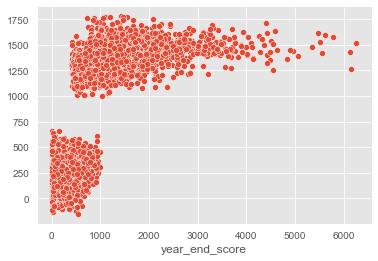

In [59]:
sns.scatterplot(y_test,predictions)

In [60]:
from sklearn import metrics

In [61]:
print('MAE:', metrics.mean_absolute_error(y_test,predictions))
print('MSE:', metrics.mean_squared_error(y_test,predictions))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test,predictions)))

MAE: 337.98920178578896
MSE: 261360.804751717
RMSE: 511.2345887669544


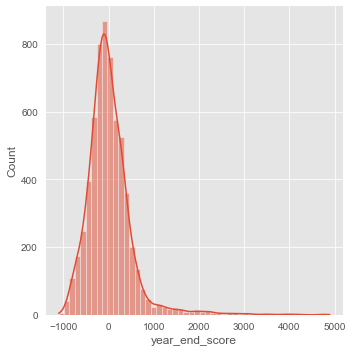

In [62]:
sns.displot((y_test-predictions),bins = 50,kde = True)

In [63]:
coef_df= pd.DataFrame(lm.coef_, (final_data.drop(['song_id','time_signature','year_end_score'],axis = 1)).columns,columns = ['Coefficient'])

In [64]:
coef_df

,Coefficient
acousticness,-216.266692
danceability,563.766444
energy,-79.779819
instrumentalness,0.715331
liveness,-54.543427
loudness,15.518616
speechiness,-63.324004
valence,-312.829643
tempo,0.079628
is_pop_True,1127.374548


In [66]:
from sklearn.preprocessing import PolynomialFeatures

In [68]:
X = final_data.drop(['song_id','time_signature','year_end_score'],axis = 1)
y = final_data['year_end_score']

In [69]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=101)

In [77]:
poly_reg = PolynomialFeatures(degree=7)
X_poly = poly_reg.fit_transform(X)
pol_reg = LinearRegression()
pol_reg.fit(X_train, y_train)

LinearRegression()

In [78]:
predictions = pol_reg.predict(X_test)

C:\Users\ASUS\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='year_end_score'>

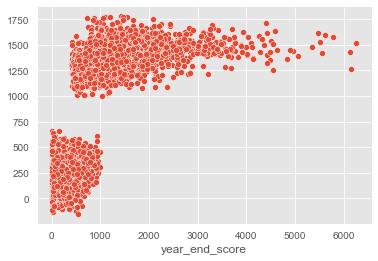

In [79]:
sns.scatterplot(y_test,predictions)

In [80]:
from sklearn import metrics

In [81]:
print('MAE:', metrics.mean_absolute_error(y_test,predictions))
print('MSE:', metrics.mean_squared_error(y_test,predictions))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test,predictions)))

MAE: 337.98920178578896
MSE: 261360.804751717
RMSE: 511.2345887669544


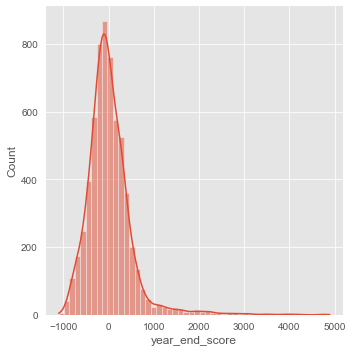

In [82]:
sns.displot((y_test-predictions),bins = 50,kde = True)

In [83]:
coef_df= pd.DataFrame(lm.coef_, (final_data.drop(['song_id','time_signature','year_end_score'],axis = 1)).columns,columns = ['Coefficient'])

In [84]:
coef_df

,Coefficient
acousticness,-216.266692
danceability,563.766444
energy,-79.779819
instrumentalness,0.715331
liveness,-54.543427
loudness,15.518616
speechiness,-63.324004
valence,-312.829643
tempo,0.079628
is_pop_True,1127.374548


In [85]:
final_data.describe()

,time_signature,acousticness,danceability,energy,instrumentalness,liveness,loudness,speechiness,valence,tempo,year_end_score,is_pop_True
count,20402.000000,20402.000000,20402.000000,20402.000000,20402.000000,20402.000000,20402.000000,20402.000000,20402.000000,20402.000000,20402.000000,20402.000000
mean,3.943584,0.265215,0.600356,0.625031,0.047551,0.192274,-8.845347,0.067533,0.607777,120.310803,777.384521,0.459024
std,0.289183,0.264377,0.150620,0.197119,0.168430,0.163929,3.593065,0.074373,0.236530,27.683967,766.740996,0.498330
min,0.000000,0.000001,0.000000,0.006640,0.000000,0.013000,-30.896000,0.000000,0.000000,0.000000,1.000000,0.000000
25%,4.000000,0.039200,0.502000,0.481000,0.000000,0.088300,-11.217750,0.031900,0.427000,99.734250,170.000000,0.000000
50%,4.000000,0.169500,0.608000,0.640000,0.000010,0.129000,-8.471000,0.040400,0.632000,118.951000,563.000000,0.000000
75%,4.000000,0.440000,0.706000,0.783000,0.001107,0.249000,-6.051000,0.063000,0.804000,135.898250,1181.000000,1.000000
max,5.000000,0.995000,0.988000,0.998000,0.985000,0.997000,3.440000,0.950000,1.000000,231.028000,6851.000000,1.000000
